In [48]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [64]:
#import the iris dataframe
from sklearn.datasets import load_iris

In [65]:
#load dataframe and visualize fist 5 elements
dataset=load_iris()
df = pd.DataFrame(dataset['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
#sns.pairplot(df)
df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
#add new column to the dataframe with the target values
df['Ground Truth Cluster']=dataset['target']

In [52]:
#plt.scatter(df['Petal Length'],df['Petal Width'])
#plt.xlabel('Petal Length')
#plt.ylabel('Petal Width')

In [53]:
#plt.scatter(df['Sepal Length'],df['Sepal Width'])
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')

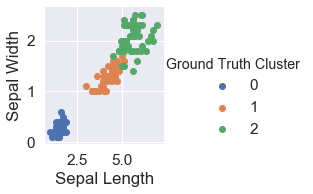

In [67]:
#plot data to identify clusters
sns.FacetGrid(df,hue="Ground Truth Cluster")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

In [86]:
#since we know which groups are which in the ground truth data, we calculate the mean values for each 
#cluster to use it as the initial values for the centroids in the k means algorithm (save them as array)
km_array=df.groupby('Ground Truth Cluster').mean().as_matrix()[:,[2,3]]
km_array

c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.462, 0.246],
       [4.26 , 1.326],
       [5.552, 2.026]])

In [56]:
#run the elbow method to get the optimal number of clusters - part 1, calculate sum of squared errors for each given k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Sepal Length','Sepal Width', 'Petal Length','Petal Width']])
    sse.append(km.inertia_)

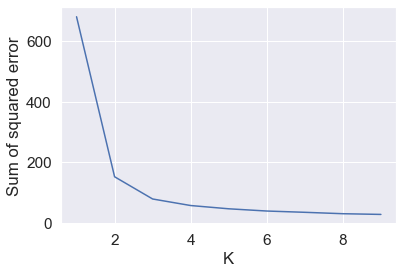

In [90]:
#plot the SSE to see where the "elbow" is
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [87]:
#run the k means algorithm for 3 clusters with the predefined centroids 
#(init=1 as we don't need several random initialisations )
km = KMeans(n_clusters=3, init=km_array, n_init=1)
y_predicted = km.fit_predict(df[['Sepal Length','Sepal Width']])
df['Predicted_cluster']=y_predicted
#add the clusters to the dataframe and get the labels that were provided in the exercise
df['Predicted_Species']=df['Predicted_cluster'].apply(lambda x: dataset['target_names'][x])
df['Ground Truth Species']=df['Ground Truth Cluster'].apply(lambda x: dataset['target_names'][x])
df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Ground Truth Cluster,Predicted_cluster,Predicted_Species,Ground Truth Species
0,5.1,3.5,1.4,0.2,0,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa,setosa


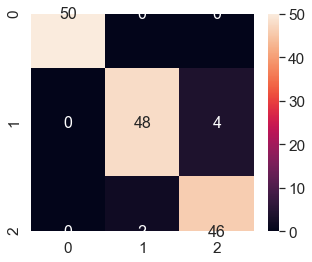

In [89]:
#generate the confusion matrix to see how the predicted data matches the known data
cm = confusion_matrix(df['Predicted_cluster'], df['Ground Truth Cluster'])
plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,annot_kws={"size": 16})# font size
